In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [2]:
# import warnings
# warnings.filterwarnings("default")

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sm = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [8]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

3451 genes across 2730 cells


In [9]:
dict_annotation = {}

dict_annotation['1Ery']='Ery'
dict_annotation['2Ery']='Ery'
dict_annotation['3Ery']='Ery'
dict_annotation['4Ery']='Ery'
dict_annotation['5Ery']='Ery'
dict_annotation['6Ery']='Ery'
dict_annotation['7MEP']='MEP'
dict_annotation['8Mk']='Mk'
dict_annotation['9GMP']='GMP'
dict_annotation['10GMP']='GMP'
dict_annotation['11DC']='DC'
dict_annotation['12Baso']='Baso'
dict_annotation['13Baso']='Baso'
dict_annotation['14Mo']='Mo'
dict_annotation['15Mo']='Mo'
dict_annotation['16Neu']='Neu'
dict_annotation['17Neu']='Neu'
dict_annotation['18Eos']='Eos'
dict_annotation['19Lymph']='Lymph'

annotation = []
for celltype in obj.obs["paul15_clusters"].tolist():
    annotation.append(dict_annotation[celltype])

obj.obs['annotation'] = annotation
obj.obs['annotation'] = obj.obs['annotation'].astype("category")

 * Merging groups and renaming (column annotation) ... 
 	* Old label 1Ery - new label Ery
 	* Old label 2Ery - new label Ery
 	* Old label 3Ery - new label Ery
 	* Old label 4Ery - new label Ery
 	* Old label 5Ery - new label Ery
 	* Old label 6Ery - new label Ery
 	* Old label 7MEP - new label MEP
 	* Old label 8Mk - new label Mk
 	* Old label 9GMP - new label GMP
 	* Old label 10GMP - new label GMP
 	* Old label 11DC - new label DC
 	* Old label 12Baso - new label Baso
 	* Old label 13Baso - new label Baso
 	* Old label 14Mo - new label Mo
 	* Old label 15Mo - new label Mo
 	* Old label 16Neu - new label Neu
 	* Old label 17Neu - new label Neu
 	* Old label 18Eos - new label Eos
 	* Old label 19Lymph - new label Lymph
 *  Groups merged


#### Data preparation

In [10]:
sm.data_preparation(obj)

#### Removing general genes

In [11]:
# obj = sm.remove_general_genes(obj)

#### Removing house-keeping genes

http://www.housekeeping.unicamp.br/?homePageGlobal

In [12]:
# obj = sm.remove_housekeepingenes(obj, path="../data/house_keeping_genes_LUNG.txt")

#### Removing genes expressed in less than 30% within groups

In [13]:
# obj = sm.remove_features_pct(obj, group_by="annotation", pct=0.3)

#### Removing genes expressed in more than 50% in a given group where genes are expressed for more 75% within a given group

In [14]:
# obj = sm.remove_features_pct_2groups(obj, group_by="annotation", pct1=0.75, pct2=0.5)

#### Revert PCA

In [15]:
# obj = sm.scale_filter_features(obj, n_components=None, filter_expression=True)

#### Data split

In [16]:
s = time.time()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data = obj.X.copy()

myDict = {}
for idx, c in enumerate(obj.obs["annotation"].cat.categories):
    myDict[c] = idx

labels = []
for l in obj.obs["annotation"].tolist():
    labels.append(myDict[l])

labels = np.array(labels)

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### RankCorr

In [19]:
sys.path.append("../../../Functions/RankCorr/")
from picturedRocks import Rocks

In [20]:
genes = obj.var.index.tolist()

In [21]:
data = Rocks(X_train, y_train)
markers = data.CSrankMarkers(lamb=3.0, writeOut=False, keepZeros=False, onlyNonZero=False)
data.genes = np.array(genes)

In [22]:
marker_genes = data.markers_to_genes(markers)

In [23]:
selectedGenes = [x for x in marker_genes if x != 'nan'][:30]

In [24]:
selectedGenes_dict = {}
selectedGenes_dict["group"] = selectedGenes

In [25]:
e = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

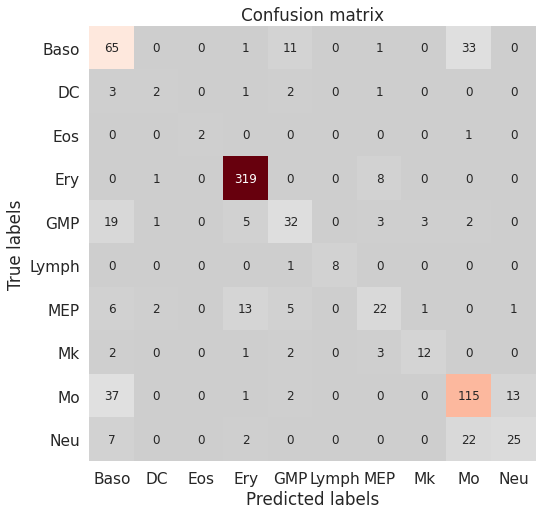

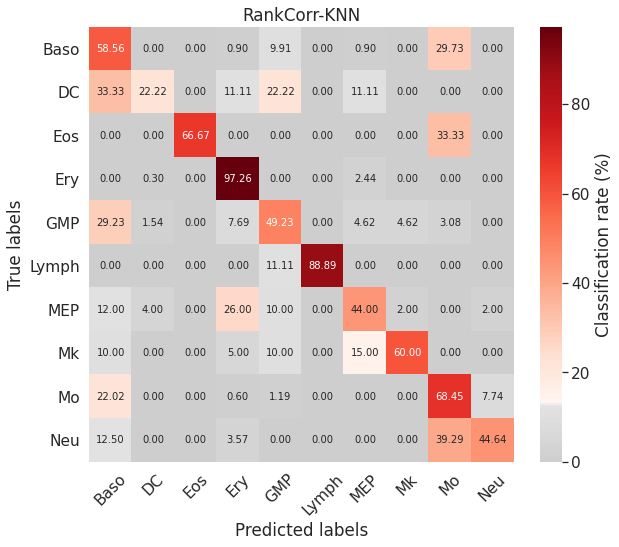

Accuracy: 0.7350427350427351: Misclassification: 0.2649572649572649
              precision    recall  f1-score   support

        Baso       0.47      0.59      0.52       111
          DC       0.33      0.22      0.27         9
         Eos       1.00      0.67      0.80         3
         Ery       0.93      0.97      0.95       328
         GMP       0.58      0.49      0.53        65
       Lymph       1.00      0.89      0.94         9
         MEP       0.58      0.44      0.50        50
          Mk       0.75      0.60      0.67        20
          Mo       0.66      0.68      0.67       168
         Neu       0.64      0.45      0.53        56

    accuracy                           0.74       819
   macro avg       0.69      0.60      0.64       819
weighted avg       0.73      0.74      0.73       819



In [26]:
sm.run_classifiers(obj, group_by="annotation", genes=selectedGenes, classifier="KNN", balance=True, title="RankCorr-KNN")

#### Heatmap selected genes

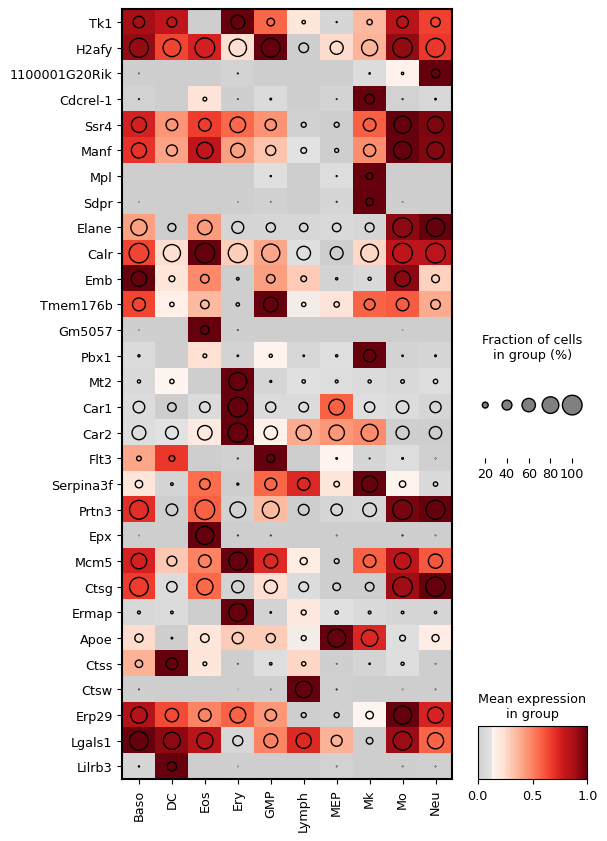

In [27]:
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 11})
ax = sc.pl.DotPlot(obj,
                   selectedGenes,
                   groupby="annotation",
                   standard_scale='var',
                   use_raw=True,
                   figsize=(6,10),
                   linewidths=2).style(cmap=mymap, color_on='square', grid=True, dot_edge_lw=1)
ax.swap_axes(swap_axes=True)
# ax.show()

ax.savefig("Figures/RankCorr_top30.pdf")

# Elapsed time

In [28]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

3451 genes across 2730 cells


In [29]:
print('Elapsed time (s): ', e-s)

Elapsed time (s):  1.2895100116729736
